In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [15]:
import pandas as pd
import efaar_benchmarking

EGFR_inhibitors = [
    'neratinib', 'gefitinib', 'lapatinib', 
    'afatinib', 'icotinib', 'vandetanib', 
    'olmutinib', 'azd9291', 'erlotinib', 
    'osi-420', 'dacomitinib'
]

# Load rxrx3

In [14]:
from efaar_benchmarking.data_loading import load_rxrx3
import anndata as ad
features, metadata = load_rxrx3('data')
rxrx3_adata = ad.read_h5ad('rxrx3.h5ad')

/home/ubuntu/EFAAR_benchmarking/.venv/lib/python3.12/site-packages/efaar_benchmarking/data_loading.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["gene"] = metadata["treatment"].apply(lambda x: x.split("_")[0] if "_control" not in x else x)


(2222103, 128)

(2222103, 128)

In [18]:
EGFR_inhibitor_adata = rxrx3_adata[rxrx3_adata.obs['treatment'].str.lower().isin(EGFR_inhibitors), :].copy()
EGFR_inhibitor_adata.shape

(352, 128)

In [21]:
EGFR_ko_adata = rxrx3_adata[rxrx3_adata.obs['gene'].isin(['EGFR']), :].copy()
EGFR_ko_adata.shape

(105, 128)

In [26]:
rxrx3_adata[rxrx3_adata.obs['gene'].isin(['EGFR']), :].obs.sort_values(by='plate').head(20)

,well_id,experiment_name,plate,address,gene,treatment,SMILES,concentration,perturbation_type,cell_type
1597190,gene-157_1_U37,gene-157,1,U37,EGFR,EGFR_guide_5,NaN,NaN,CRISPR,HUVEC
1664793,gene-157_1_D45,gene-157,1,D45,EGFR,EGFR_guide_2,NaN,NaN,CRISPR,HUVEC
2003921,gene-157_1_AA42,gene-157,1,AA42,EGFR,EGFR_guide_3,NaN,NaN,CRISPR,HUVEC
1126666,gene-081_1_D22,gene-081,1,D22,EGFR,EGFR_guide_5,NaN,NaN,CRISPR,HUVEC
1113933,gene-081_1_B29,gene-081,1,B29,EGFR,EGFR_guide_4,NaN,NaN,CRISPR,HUVEC
1107341,gene-081_1_I16,gene-081,1,I16,EGFR,EGFR_guide_3,NaN,NaN,CRISPR,HUVEC
163834,gene-081_1_P35,gene-081,1,P35,EGFR,EGFR_guide_2,NaN,NaN,CRISPR,HUVEC
1611232,gene-157_1_U47,gene-157,1,U47,EGFR,EGFR_guide_4,NaN,NaN,CRISPR,HUVEC
512074,gene-081_1_AE32,gene-081,1,AE32,EGFR,EGFR_guide_6,NaN,NaN,CRISPR,HUVEC
864669,gene-081_1_I25,gene-081,1,I25,EGFR,EGFR_guide_1,NaN,NaN,CRISPR,HUVEC


In [ ]:

rxrx3_adata.shape

# Filter the blinded and control treatments
blind_mask = ~rxrx3_adata.obs['treatment'].str.contains('RXRX')
control_mask = rxrx3_adata.obs['treatment'].isin(['EMPTY_control', 'CRISPR_control'])
# rxrx3_adata = rxrx3_adata[blind_mask & control_mask, :].copy()
rxrx3_adata.shape

,well_id,experiment_name,plate,address,gene,treatment,SMILES,concentration,perturbation_type,cell_type
375,compound-004_31_C45,compound-004,31,C45,NaN,Neratinib,CCOC1=CC2=C(C=C1NC(=O)\C=C\CN(C)C)C(NC1=CC(Cl)...,0.100,COMPOUND,HUVEC
2167,compound-003_4_AA05,compound-003,4,AA05,NaN,Gefitinib,COC1=C(OCCCN2CCOCC2)C=C2C(NC3=CC=C(F)C(Cl)=C3)...,0.250,COMPOUND,HUVEC
13395,compound-004_15_L18,compound-004,15,L18,NaN,Lapatinib,CS(=O)(=O)CCNCC1=CC=C(O1)C1=CC=C2N=CN=C(NC3=CC...,0.025,COMPOUND,HUVEC
18505,compound-003_10_N40,compound-003,10,N40,NaN,afatinib,CN(C)C\C=C\C(=O)NC1=C(O[C@H]2CCOC2)C=C2N=CN=C(...,0.025,COMPOUND,HUVEC
23605,compound-001_16_Z41,compound-001,16,Z41,NaN,Icotinib,C#CC1=CC(NC2=NC=NC3=C2C=C2OCCOCCOCCOC2=C3)=CC=...,2.500,COMPOUND,HUVEC
...,...,...,...,...,...,...,...,...,...,...
1154272,compound-001_31_AD33,compound-001,31,AD33,NaN,Dacomitinib,COC1=C(NC(=O)\C=C\CN2CCCCC2)C=C2C(NC3=CC(Cl)=C...,0.025,COMPOUND,HUVEC
1159275,compound-003_17_V43,compound-003,17,V43,NaN,Erlotinib,COCCOC1=CC2=C(C=C1OCCOC)C(NC1=CC(=CC=C1)C#C)=N...,0.010,COMPOUND,HUVEC
1159554,compound-003_10_B47,compound-003,10,B47,NaN,afatinib,CN(C)C\C=C\C(=O)NC1=C(O[C@H]2CCOC2)C=C2N=CN=C(...,2.500,COMPOUND,HUVEC
1161205,compound-003_10_J36,compound-003,10,J36,NaN,OSI-420,COCCOC1=CC2=C(C=C1OCCO)C(NC1=CC=CC(=C1)C#C)=NC...,10.000,COMPOUND,HUVEC


# Get just the EGFR-implicated rows.

* EGFR CRISPR KO
* Neratinib
* Gefitinib
* Lapatinib
* Afatinib
* Icotinib
* Vandetanib
* Olmutinib
* AZD9291
* Erlotinib
* OSI-420 (Osimertinib)
* Dacomitinib


In [4]:
EGFR_inhibitors = [
    'Neratinib', 'Gefitinib', 'Lapatinib', 
    'afatinib', 'icotinib', 'vandetanib', 
    'olmutinib', 'AZD9291', 'erlotinib', 
    'osi-420', 'dacomitinib'
]

In [5]:
from efaar_benchmarking.benchmarking import pert_signal_magnitude_benchmark

pert_signal_magnitude_benchmark(
    features=rxrx3_adata.X, 
    metadata=rxrx3_adata.obs, 
    pert_col='treatment', 
    control_key='EMPTY_control', 
    neg_ctrl_perts=['CRISPR_control'], 
    n_jobs=1)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
/home/ubuntu/EFAAR_benchmarking/.venv/lib/python3.12/site-packages/efaar_benchmarking/benchmarking.py:116: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  edist = SamplesLoss("energy")(from_numpy(arr1), from_numpy(arr2)).item() * 2
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


RuntimeError: [enforce fail at alloc_cpu.cpp:117] err == 0. DefaultCPUAllocator: can't allocate memory: you tried to allocate 149578656516 bytes. Error code 12 (Cannot allocate memory)

In [25]:
import anndata
from anndata import AnnData

rxrx3 = anndata.read_h5ad('rxrx3.h5ad')

In [26]:
# Load rxrx3
from pathlib import Path

embeddings_dir = Path('embeddings/embeddings')
embeddings = []

# Collect gene/compound information
for perturbation_dir in embeddings_dir.glob('*'):
    perturbation = perturbation_dir.stem

    for plate_dir in perturbation_dir.glob('Plate*'):
        plate = plate_dir.stem
        plate_embeddings = pd.read_parquet(plate_dir / 'embeddings.parquet')
        plate_embeddings['perturbation'] = perturbation
        plate_embeddings['plate'] = plate
        embeddings.append(plate_embeddings)

embeddings = pd.concat(embeddings)
embeddings = embeddings.set_index(['perturbation', 'plate', 'well_id'], append=True).sort_index()
embeddings.head()
# pd.read_parquet(embeddings_dir / 'gene-081/embeddings.parquet')

feature_0  feature_1  feature_2  \
  perturbation plate   well_id                                                 
0 compound-001 Plate1  compound-001_1_AA02    0.709634  -0.768225  -0.497911   
               Plate10 compound-001_10_AA02   1.450564  -1.648573  -0.875527   
               Plate11 compound-001_11_AA02  -0.039333  -1.133059   0.624179   
               Plate12 compound-001_12_AA02   0.344491  -0.935645  -0.866387   
               Plate13 compound-001_13_AA02  -0.074804  -2.034108  -0.004318   

                                             feature_3  feature_4  feature_5  \
  perturbation plate   well_id                                                 
0 compound-001 Plate1  compound-001_1_AA02   -0.620302   0.351902   0.388734   
               Plate10 compound-001_10_AA02   0.512840  -1.072523   1.974304   
               Plate11 compound-001_11_AA02  -0.235954  -0.037926  -0.088617   
               Plate12 compound-001_12_AA02   0.520289  -0.571171   0.518187   
               Plate13 compound-001_13_AA02   2.018849  -1.906054  -0.375498   

                                             feature_6  feature_7  feature_8  \
  perturbation plate   well_id                                                 
0 compound-001 Plate1  compound-001_1_AA02    0.093894   1.783425   3.851984   
               Plate10 compound-001_10_AA02   0.949792   1.397310   0.275833   
               Plate11 compound-001_11_AA02   0.283994   0.355639   0.731004   
               Plate12 compound-001_12_AA02   0.122333   0.670604   0.448834   
               Plate13 compound-001_13_AA02   0.334274   1.708398   1.840071   

                                             feature_9  ...  feature_118  \
  perturbation plate   well_id                          ...                
0 compound-001 Plate1  compound-001_1_AA02   -0.591740  ...    -1.025465   
               Plate10 compound-001_10_AA02  -1.845472  ...    -1.615930   
               Plate11 compound-001_11_AA02  -0.702422  ...     0.153732   
               Plate12 compound-001_12_AA02   0.123717  ...    -0.879735   
               Plate13 compound-001_13_AA02  -0.335705  ...    -0.884005   

                                             feature_119  feature_120  \
  perturbation plate   well_id                                          
0 compound-001 Plate1  compound-001_1_AA02     -2.185118    -1.086824   
               Plate10 compound-001_10_AA02    -2.295920     0.185063   
               Plate11 compound-001_11_AA02    -1.640844     0.186680   
               Plate12 compound-001_12_AA02    -1.030755     0.798716   
               Plate13 compound-001_13_AA02    -2.685607    -0.216335   

                                             feature_121  feature_122  \
  perturbation plate   well_id                                          
0 compound-001 Plate1  compound-001_1_AA02      0.100193    -2.143729   
               Plate10 compound-001_10_AA02     1.866405    -1.237668   
               Plate11 compound-001_11_AA02     0.412316    -0.264976   
               Plate12 compound-001_12_AA02    -0.005123    -1.121304   
               Plate13 compound-001_13_AA02     1.122263    -2.083131   

                                             feature_123  feature_124  \
  perturbation plate   well_id                                          
0 compound-001 Plate1  compound-001_1_AA02      0.189679     2.641551   
               Plate10 compound-001_10_AA02     1.286603     0.788397   
               Plate11 compound-001_11_AA02     1.065328     0.326769   
               Plate12 compound-001_12_AA02     1.273092     0.849975   
               Plate13 compound-001_13_AA02     1.448450     0.805237   

                                             feature_125  feature_126  \
  perturbation plate   well_id                                          
0 compound-001 Plate1  compound-001_1_AA02     -0.856430     2.079296   
               Plate10 compound-001_10_AA02     0.376628     1.374851   
 

In [27]:
embeddings.shape

(2406720, 128)

# Metadata

In [28]:
metadata = pd.read_csv('metadata_rxrx3.csv')
metadata

/tmp/ipykernel_28590/4135736851.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('metadata_rxrx3.csv')


,well_id,experiment_name,plate,address,gene,treatment,SMILES,concentration,perturbation_type,cell_type
0,gene-044_6_I27,gene-044,6,I27,RXRX3-65482,RXRX3-65482_guide_3,NaN,NaN,CRISPR,HUVEC
1,compound-003_11_AD37,compound-003,11,AD37,NaN,Phloretin,"OC1=CC=C(CCC(=O)C2=C(O)C=C(O)C=C2O)C=C1 |c:9,1...",0.025,COMPOUND,HUVEC
2,gene-065_5_O32,gene-065,5,O32,RXRX3-44488,RXRX3-44488_guide_1,NaN,NaN,CRISPR,HUVEC
3,gene-021_3_X40,gene-021,3,X40,RXRX3-36525,RXRX3-36525_guide_1,NaN,NaN,CRISPR,HUVEC
4,gene-041_2_AD47,gene-041,2,AD47,RXRX3-98689,RXRX3-98689_guide_3,NaN,NaN,CRISPR,HUVEC
...,...,...,...,...,...,...,...,...,...,...
2222098,gene-176_9_AA05,gene-176,9,AA05,RXRX3-54999,RXRX3-54999_guide_5,NaN,NaN,CRISPR,HUVEC
2222099,gene-176_7_U06,gene-176,7,U06,RXRX3-86169,RXRX3-86169_guide_3,NaN,NaN,CRISPR,HUVEC
2222100,gene-176_6_S17,gene-176,6,S17,EMPTY_control,EMPTY_control,NaN,NaN,CRISPR,HUVEC
2222101,gene-176_9_H11,gene-176,9,H11,RXRX3-26024,RXRX3-26024_guide_5,NaN,NaN,CRISPR,HUVEC


# EGFR KO is in two experiments

We will download the images from rxrx for these two experiments and fish out the EGFR images

In [ ]:
metadata[metadata['gene'] == 'EGFR']['experiment_name'].unique()

In [6]:
from pathlib import Path
import tarfile
# n.b., AZD9291 is Osimertinib
egfr_inhibitors = [
    'Neratinib', 'Gefitinib', 'Lapatinib', 
    'afatinib', 'Icotinib', 'Vandetanib', 
    'Olmutinib', 'AZD9291', 'Erlotinib', 
    'OSI-420', 'Dacomitinib'
]

# Four replicates per treatment (all different plates), seems like one experiment


for treatment in egfr_inhibitors:
    treatment_metadata = metadata[metadata['treatment'] == treatment]
    treatment_metadata = treatment_metadata
    experiment_name = treatment_metadata['experiment_name'].unique()[0]

    for _, row in treatment_metadata.iterrows():
        experiment_name = row['experiment_name']
        address = row['address']
        filenames = [f'{address}_s1_w{i}.png' for i in range(1, 7)]
        plate = f'Plate{row["plate"]}'
        concentration = row['concentration']

        if experiment_name in ['compound-001', 'compound-002']:
            image_folder = Path('/mnt/data/rxrx3/images') / experiment_name
        else:
            image_folder = Path('/mnt/data2') / experiment_name
        tar_filename = image_folder / f'{plate}.tar'

        output_directory = Path(treatment)
        output_directory.mkdir(exist_ok=True)
        with tarfile.open(tar_filename, 'r') as tar:
            for file in filenames:
                tar.extract(file, path=output_directory)

KeyboardInterrupt: 

In [31]:
metadata.query('(perturbation_type=="CRISPR") & (gene == "EMPTY_control") & (experiment_name == "gene-081")')

,well_id,experiment_name,plate,address,gene,treatment,SMILES,concentration,perturbation_type,cell_type
1607,gene-081_2_U15,gene-081,2,U15,EMPTY_control,EMPTY_control,NaN,NaN,CRISPR,HUVEC
1642,gene-081_2_R13,gene-081,2,R13,EMPTY_control,EMPTY_control,NaN,NaN,CRISPR,HUVEC
2915,gene-081_4_AC39,gene-081,4,AC39,EMPTY_control,EMPTY_control,NaN,NaN,CRISPR,HUVEC
3345,gene-081_1_E42,gene-081,1,E42,EMPTY_control,EMPTY_control,NaN,NaN,CRISPR,HUVEC
4127,gene-081_7_Q41,gene-081,7,Q41,EMPTY_control,EMPTY_control,NaN,NaN,CRISPR,HUVEC
...,...,...,...,...,...,...,...,...,...,...
1160217,gene-081_5_X38,gene-081,5,X38,EMPTY_control,EMPTY_control,NaN,NaN,CRISPR,HUVEC
1160474,gene-081_2_T46,gene-081,2,T46,EMPTY_control,EMPTY_control,NaN,NaN,CRISPR,HUVEC
1161700,gene-081_4_C18,gene-081,4,C18,EMPTY_control,EMPTY_control,NaN,NaN,CRISPR,HUVEC
1162076,gene-081_1_Q14,gene-081,1,Q14,EMPTY_control,EMPTY_control,NaN,NaN,CRISPR,HUVEC


In [32]:
compound_crispr_control = metadata.query('(perturbation_type == "COMPOUND") & (treatment == "CRISPR_control")')
compound_empty_control = metadata.query('(perturbation_type == "COMPOUND") & (treatment == "EMPTY_control")')


# Extract all of the controls for compounds

We are parallelizing this because it's a lot of controls

In [5]:
import tarfile
from pathlib import Path
import concurrent.futures

controls = [
    'EMPTY_control',
    'CRISPR_control'
]

# Four replicates per treatment (all different plates), seems like one experiment

def extract_files(row):
    import tarfile
    from pathlib import Path

    treatment = row['treatment']
    experiment_name = row['experiment_name']
    address = row['address']
    plate = f'Plate{row["plate"]}'
    concentration = row['concentration']
    filenames = [f'{address}_s1_w{i}.png' for i in range(1, 7)]

    if experiment_name in ['compound-001', 'compound-002']:
        image_folder = Path('/mnt/data/rxrx3/images') / experiment_name
    else:
        image_folder = Path('/mnt/data2') / experiment_name
    tar_filename = image_folder / f'{plate}.tar'

    output_directory = Path(treatment)
    output_directory.mkdir(exist_ok=True)

    try:
        with tarfile.open(tar_filename, 'r') as tar:
            for file in filenames:
                tar.extract(file, path=f'egfr-images/{output_directory}')
                # print(f'Extracting {file} to egfr-images/{output_directory}')
    except Exception as e:
        print(f"Error extracting files for {treatment} in {tar_filename}: {e}")

controls = ['CRISPR_control', 'EMPTY_control']
all_rows = []

# Counting the number of CRISPR_control and EMPTY_control
# metadata.pipe(lambda df: df[df['perturbation_type'] == 'COMPOUND']).pipe(lambda df: df[df['SMILES'].isna()]).groupby('treatment').size()

control_metadata = metadata.pipe(lambda df: df[df['perturbation_type'] == 'COMPOUND']).pipe(lambda df: df[df['SMILES'].isna()])
all_rows.extend(control_metadata.to_dict('records'))

with concurrent.futures.ProcessPoolExecutor() as executor:
    executor.map(extract_files, all_rows)

Error extracting files for CRISPR_control in /mnt/data2/compound-004/Plate46.tar: [Errno 17] File exists: 'egfr-images/CRISPR_control'Error extracting files for CRISPR_control in /mnt/data/rxrx3/images/compound-002/Plate9.tar: [Errno 17] File exists: 'egfr-images/CRISPR_control'Error extracting files for CRISPR_control in /mnt/data2/compound-004/Plate43.tar: [Errno 17] File exists: 'egfr-images/CRISPR_control'Error extracting files for EMPTY_control in /mnt/data/rxrx3/images/compound-002/Plate1.tar: [Errno 17] File exists: 'egfr-images/EMPTY_control'





<generator object _chain_from_iterable_of_lists at 0x7cfaa8500860>

KeyboardInterrupt: 

In [33]:
lincs_sm = pd.read_csv('LINCS_small_molecules.tsv', delimiter='\t')
# lincs_sm[lincs_sm['pert_name'].isin([x.lower() for x in egfr_inhibitors])]
lincs_sm[lincs_sm['pert_name'].isin(metadata['treatment'].str.lower())].to_csv('rxrx3_lincs_annotations.tsv', sep='\t')

In [ ]:
metadata[metadata['treatment'] == 'afatinib']

# Download and Extract Images for EGFR and control.

Experiments: gene-081 and gene-157

In [34]:
import os
from collections import defaultdict
import subprocess

def extract_image_filenames_for_gene(gene, experiment_name):
    df = metadata.copy()
    df = df[(df['gene'] == gene) & (df['experiment_name'] == experiment_name)]
    filenames_by_experiment = defaultdict(list)
    for (experiment_name, plate_name), sub_df in df.groupby(['experiment_name', 'plate']):
        for _, row in sub_df.iterrows():
            address = row['address']
            plate = row['plate']
            filenames_by_experiment[experiment_name].append((plate, [f'{address}_s1_w{i}.png' for i in range(1, 7)]))
    return filenames_by_experiment

def extract_files_from_tars(tar_folder, gene, experiment_name):
    # get image filenames for the gene and experiment
    image_filenames = extract_image_filenames_for_gene(gene, experiment_name)
    
    # create a folder with the gene name
    gene_folder = os.path.join(os.getcwd(), f'{experiment_name}_{gene}')
    print(gene_folder)
    if not os.path.exists(gene_folder):
        os.makedirs(gene_folder)
    
    # iterate over the filenames and associated plate
    for exp_name, plate_file_lists in image_filenames.items():
        for plate, file_list in plate_file_lists:
            # locate the correct tar file based on the plate name
            tar_file = os.path.join(tar_folder, f'Plate{plate}.tar')
            
            if not os.path.exists(tar_file):
                print(f'Tar file for plate {plate} not found: {tar_file}')
                continue
            
            # extract the files from the appropriate tar into the gene folder
            for filename in file_list:
                # change to the gene folder before extracting
                with ChangeDirectory(gene_folder):
                    # extract only the specific file from the tar
                    _ = subprocess.run(['tar', '-xvf', tar_file, filename])
                    
# helper context manager to change directories temporarily
class ChangeDirectory:
    def __init__(self, path):
        self.new_dir = path
        self.old_dir = os.getcwd()

    def __enter__(self):
        os.chdir(self.new_dir)

    def __exit__(self, etype, value, traceback):
        os.chdir(self.old_dir)

# usage
tar_folder = '/mnt/data/rxrx3/images/gene-081'
gene = 'EMPTY_control'
experiment_name = 'gene-081'

extract_files_from_tars(tar_folder, gene, experiment_name)

/home/ubuntu/EFAAR_benchmarking/notebooks/gene-081_EMPTY_control
E42_s1_w1.png
E42_s1_w2.png
E42_s1_w3.png
E42_s1_w4.png
E42_s1_w5.png
E42_s1_w6.png
Q45_s1_w1.png
Q45_s1_w2.png
Q45_s1_w3.png
Q45_s1_w4.png
Q45_s1_w5.png
Q45_s1_w6.png
F09_s1_w1.png
F09_s1_w2.png
F09_s1_w3.png
F09_s1_w4.png
F09_s1_w5.png
F09_s1_w6.png
Z05_s1_w1.png
Z05_s1_w2.png
Z05_s1_w3.png
Z05_s1_w4.png
Z05_s1_w5.png
Z05_s1_w6.png
Y14_s1_w1.png
Y14_s1_w2.png
Y14_s1_w3.png
Y14_s1_w4.png
Y14_s1_w5.png
Y14_s1_w6.png
X14_s1_w1.png
X14_s1_w2.png
X14_s1_w3.png
X14_s1_w4.png
X14_s1_w5.png
X14_s1_w6.png
Q33_s1_w1.png
Q33_s1_w2.png
Q33_s1_w3.png
Q33_s1_w4.png
Q33_s1_w5.png
Q33_s1_w6.png
C12_s1_w1.png
C12_s1_w2.png
C12_s1_w3.png
C12_s1_w4.png
C12_s1_w5.png
C12_s1_w6.png
K08_s1_w1.png
K08_s1_w2.png
K08_s1_w3.png
K08_s1_w4.png
K08_s1_w5.png
K08_s1_w6.png
AA18_s1_w1.png
AA18_s1_w2.png
AA18_s1_w3.png
AA18_s1_w4.png
AA18_s1_w5.png
AA18_s1_w6.png
R33_s1_w1.png
R33_s1_w2.png
R33_s1_w3.png
R33_s1_w4.png
R33_s1_w5.png
R33_s1_w6.png
E09_s

In [35]:
from anndata import AnnData


X = embeddings.loc[embeddings.index.get_level_values(3).isin(metadata['well_id']), :].values
adata = AnnData(X, metadata)
#adata.write('rxrx3.h5ad')

/home/ubuntu/EFAAR_benchmarking/.venv/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [36]:
adata

AnnData object with n_obs × n_vars = 2222103 × 128
    obs: 'well_id', 'experiment_name', 'plate', 'address', 'gene', 'treatment', 'SMILES', 'concentration', 'perturbation_type', 'cell_type'

In [ ]:
adata

In [37]:
from efaar_benchmarking import benchmarking, efaar

# Center-scale by plates then controls
# efaar.centerscale_by_batch(embeddings, metadata, 'plate')

efaar.embed_by_pca_anndata(adata, batch_col='plate')

array([[-8.76647949e-01, -8.63613033e+00,  6.56340075e+00, ...,
         1.34253919e-01, -8.43352824e-02,  2.60117352e-02],
       [-1.16707814e+00, -6.05271053e+00,  4.30687952e+00, ...,
        -1.46670982e-01, -1.82582382e-02,  1.49979115e-01],
       [ 5.81448257e-01, -7.68180704e+00,  1.09311008e+00, ...,
         2.90182121e-02,  5.80552891e-02,  5.28438296e-03],
       ...,
       [-3.48688388e+00,  3.58355570e+00,  8.18530560e+00, ...,
         5.01710139e-02,  1.14136934e-01, -4.81927812e-01],
       [-1.61354482e+00, -3.15003729e+00,  9.65834618e+00, ...,
         1.37146235e-01, -4.68511544e-02, -4.60703932e-02],
       [ 3.21860456e+00, -3.92928743e+00,  1.45251894e+00, ...,
         5.58313243e-02,  2.13461109e-02, -1.28045887e-01]], dtype=float32)

In [38]:
efaar.centerscale_by_batch(adata.X, adata.obs, batch_col='experiment_name')

array([[-0.14319196, -2.3198295 ,  0.06326733, ..., -1.2543453 ,
         1.9121215 , -1.8977472 ],
       [ 2.2402515 , -1.6027682 , -1.1569496 , ..., -0.24741293,
         1.4477566 , -1.0491662 ],
       [ 0.47083017, -1.0730064 ,  0.28107992, ...,  0.27351597,
         1.4779071 , -0.6566376 ],
       ...,
       [ 3.567991  ,  0.6563865 , -1.2903156 , ...,  3.15046   ,
         1.579975  , -1.6611334 ],
       [ 2.6129322 , -0.37379193,  0.0550977 , ...,  1.6605968 ,
         4.2210197 , -1.8103533 ],
       [ 0.00774317, -0.8530251 ,  0.946675  , ...,  0.1513166 ,
         0.25086662, -0.29101562]], dtype=float32)

In [39]:
efaar.centerscale_on_controls(adata.X, adata.obs, 'treatment', 'EMPTY_control')

array([[-0.158293  , -2.4529176 ,  0.1180924 , ..., -1.2878866 ,
         2.1583846 , -1.9865968 ],
       [ 2.2418444 , -1.7374274 , -1.0938352 , ..., -0.31116745,
         1.6657395 , -1.1458234 ],
       [ 0.44861996, -1.1847403 ,  0.34584227, ...,  0.2169535 ,
         1.6919817 , -0.74752533],
       ...,
       [ 3.4100308 ,  0.29438648, -1.1841335 , ...,  2.70505   ,
         1.7687951 , -1.8164661 ],
       [ 2.482476  , -0.677774  ,  0.07751173, ...,  1.3196008 ,
         4.160683  , -1.9510763 ],
       [-0.04768841, -1.1300175 ,  0.91357774, ..., -0.0839048 ,
         0.56507504, -0.5804944 ]], dtype=float32)

In [40]:
adata.obs.pipe(lambda df: df[(df['gene'] == 'EMPTY_control') & (df['treatment'] == 'EMPTY_control')])

,well_id,experiment_name,plate,address,gene,treatment,SMILES,concentration,perturbation_type,cell_type
27,gene-060_9_P28,gene-060,9,P28,EMPTY_control,EMPTY_control,NaN,NaN,CRISPR,HUVEC
36,gene-017_9_AD30,gene-017,9,AD30,EMPTY_control,EMPTY_control,NaN,NaN,CRISPR,HUVEC
39,gene-069_4_AB36,gene-069,4,AB36,EMPTY_control,EMPTY_control,NaN,NaN,CRISPR,HUVEC
91,gene-043_1_P42,gene-043,1,P42,EMPTY_control,EMPTY_control,NaN,NaN,CRISPR,HUVEC
105,gene-036_4_Z30,gene-036,4,Z30,EMPTY_control,EMPTY_control,NaN,NaN,CRISPR,HUVEC
...,...,...,...,...,...,...,...,...,...,...
2222039,gene-176_4_H33,gene-176,4,H33,EMPTY_control,EMPTY_control,NaN,NaN,CRISPR,HUVEC
2222043,gene-176_2_X02,gene-176,2,X02,EMPTY_control,EMPTY_control,NaN,NaN,CRISPR,HUVEC
2222050,gene-176_8_E45,gene-176,8,E45,EMPTY_control,EMPTY_control,NaN,NaN,CRISPR,HUVEC
2222073,gene-176_5_Z15,gene-176,5,Z15,EMPTY_control,EMPTY_control,NaN,NaN,CRISPR,HUVEC


In [41]:
# Empty control across all compound perturbations
adata.obs.pipe(lambda df: df[(df['gene'].isna()) & (df['treatment'] == 'EMPTY_control')])

,well_id,experiment_name,plate,address,gene,treatment,SMILES,concentration,perturbation_type,cell_type
49,compound-001_11_U08,compound-001,11,U08,NaN,EMPTY_control,NaN,NaN,COMPOUND,HUVEC
76,compound-002_1_F41,compound-002,1,F41,NaN,EMPTY_control,NaN,NaN,COMPOUND,HUVEC
134,compound-003_34_D22,compound-003,34,D22,NaN,EMPTY_control,NaN,NaN,COMPOUND,HUVEC
292,compound-001_5_R46,compound-001,5,R46,NaN,EMPTY_control,NaN,NaN,COMPOUND,HUVEC
327,compound-003_2_M26,compound-003,2,M26,NaN,EMPTY_control,NaN,NaN,COMPOUND,HUVEC
...,...,...,...,...,...,...,...,...,...,...
1165370,compound-003_37_K19,compound-003,37,K19,NaN,EMPTY_control,NaN,NaN,COMPOUND,HUVEC
1165476,compound-003_27_AE34,compound-003,27,AE34,NaN,EMPTY_control,NaN,NaN,COMPOUND,HUVEC
1165598,compound-004_10_G40,compound-004,10,G40,NaN,EMPTY_control,NaN,NaN,COMPOUND,HUVEC
1165621,compound-004_21_AD15,compound-004,21,AD15,NaN,EMPTY_control,NaN,NaN,COMPOUND,HUVEC


In [42]:
adata.obs.pipe(lambda df: df[(df['gene'].isna()) & (df['treatment'] != 'EMPTY_control')]).pipe(lambda df: df[df['treatment'].str.contains('control')])


                                                                                               

,well_id,experiment_name,plate,address,gene,treatment,SMILES,concentration,perturbation_type,cell_type
50,compound-004_43_B08,compound-004,43,B08,NaN,CRISPR_control,NaN,NaN,COMPOUND,HUVEC
63,compound-001_25_J22,compound-001,25,J22,NaN,CRISPR_control,NaN,NaN,COMPOUND,HUVEC
150,compound-001_43_J29,compound-001,43,J29,NaN,CRISPR_control,NaN,NaN,COMPOUND,HUVEC
184,compound-001_40_B34,compound-001,40,B34,NaN,CRISPR_control,NaN,NaN,COMPOUND,HUVEC
198,compound-002_16_Z33,compound-002,16,Z33,NaN,CRISPR_control,NaN,NaN,COMPOUND,HUVEC
...,...,...,...,...,...,...,...,...,...,...
1165888,compound-004_31_P05,compound-004,31,P05,NaN,CRISPR_control,NaN,NaN,COMPOUND,HUVEC
1165946,compound-004_39_S45,compound-004,39,S45,NaN,CRISPR_control,NaN,NaN,COMPOUND,HUVEC
1165975,compound-002_4_V27,compound-002,4,V27,NaN,CRISPR_control,NaN,NaN,COMPOUND,HUVEC
1166007,compound-003_33_G32,compound-003,33,G32,NaN,CRISPR_control,NaN,NaN,COMPOUND,HUVEC


In [43]:
adata[adata.obs['gene'] == 'EGFR', :].obs

adata[adata.obs['experiment_name'] == 'gene-081', :].obs

,well_id,experiment_name,plate,address,gene,treatment,SMILES,concentration,perturbation_type,cell_type
2285,gene-081_5_B14,gene-081,5,B14,EGFR,EGFR_guide_3,NaN,NaN,CRISPR,HUVEC
3386,gene-081_6_O39,gene-081,6,O39,EGFR,EGFR_guide_4,NaN,NaN,CRISPR,HUVEC
12256,gene-081_9_W42,gene-081,9,W42,EGFR,EGFR_guide_6,NaN,NaN,CRISPR,HUVEC
15898,gene-081_8_AC31,gene-081,8,AC31,EGFR,EGFR_guide_3,NaN,NaN,CRISPR,HUVEC
18600,gene-081_7_Y17,gene-081,7,Y17,EGFR,EGFR_guide_1,NaN,NaN,CRISPR,HUVEC
...,...,...,...,...,...,...,...,...,...,...
2003921,gene-157_1_AA42,gene-157,1,AA42,EGFR,EGFR_guide_3,NaN,NaN,CRISPR,HUVEC
2010902,gene-157_2_P08,gene-157,2,P08,EGFR,EGFR_guide_3,NaN,NaN,CRISPR,HUVEC
2018193,gene-157_9_N20,gene-157,9,N20,EGFR,EGFR_guide_3,NaN,NaN,CRISPR,HUVEC
2116883,gene-157_8_AC24,gene-157,8,AC24,EGFR,EGFR_guide_1,NaN,NaN,CRISPR,HUVEC


,well_id,experiment_name,plate,address,gene,treatment,SMILES,concentration,perturbation_type,cell_type
149,gene-081_6_L06,gene-081,6,L06,RXRX3-70129,RXRX3-70129_guide_2,NaN,NaN,CRISPR,HUVEC
214,gene-081_5_AB05,gene-081,5,AB05,RXRX3-48767,RXRX3-48767_guide_3,NaN,NaN,CRISPR,HUVEC
313,gene-081_4_AA02,gene-081,4,AA02,RXRX3-63101,RXRX3-63101_guide_1,NaN,NaN,CRISPR,HUVEC
435,gene-081_1_D14,gene-081,1,D14,RXRX3-16738,RXRX3-16738_guide_4,NaN,NaN,CRISPR,HUVEC
489,gene-081_5_T34,gene-081,5,T34,RXRX3-73467,RXRX3-73467_guide_5,NaN,NaN,CRISPR,HUVEC
...,...,...,...,...,...,...,...,...,...,...
1165744,gene-081_7_M44,gene-081,7,M44,RXRX3-83699,RXRX3-83699_guide_6,NaN,NaN,CRISPR,HUVEC
1165816,gene-081_3_AA06,gene-081,3,AA06,EMPTY_control,EMPTY_control,NaN,NaN,CRISPR,HUVEC
1165821,gene-081_3_J07,gene-081,3,J07,RXRX3-17115,RXRX3-17115_guide_2,NaN,NaN,CRISPR,HUVEC
1165845,gene-081_9_C11,gene-081,9,C11,RXRX3-74204,RXRX3-74204_guide_2,NaN,NaN,CRISPR,HUVEC


# Get the unmasked genes

In [44]:
named_gene_metadata = adata.obs[(
    ~adata.obs['treatment'].str.contains('RXRX3')) \
    & (adata.obs['SMILES'].isna()) \
    & (~adata.obs['gene'].isna()) \
    & (adata.obs['treatment'] != 'EMPTY_control')
]
genes = named_gene_metadata['gene'].unique().tolist()
len(genes)

735

In [45]:
gene2experiment = {}
for gene in genes:
    exps = adata[adata.obs['gene'] == gene].obs['experiment_name'].unique().tolist()
    gene2experiment[gene] = exps

import json
with open('gene2experiment.json', 'w+') as f:
    json.dump(gene2experiment, f)

In [46]:
gene2experiment['EGFR']

['gene-081', 'gene-157']

In [47]:
from pathlib import Path
def collect_gene_embeddings(gene_name):
    embeddings_folder = Path(f'embeddings/embeddings/{gene_name}')
    all_embeddings = []
    for plate_folder in embeddings_folder.glob('Plate*'):
        plate_name = plate_folder.stem
        parquet_file = plate_folder / 'embeddings.parquet'
        embeddings = pd.read_parquet(parquet_file)
        embeddings = embeddings.set_index('well_id')
        embeddings['plate'] = plate_name
        all_embeddings.append(embeddings)
    all_embeddings = pd.concat(all_embeddings)
    return all_embeddings
        
gene_081_embeddings = collect_gene_embeddings('gene-081')
gene_081_embeddings


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,plate
well_id,,,,,,,,,,,,,,,,,,,,,
gene-081_8_AA02,0.329470,-1.359841,0.332170,1.443502,-2.718543,0.241154,0.632524,0.501929,-0.065840,0.541407,...,-0.450147,-0.777163,-0.844304,0.222162,0.612586,-0.381469,-2.271389,0.985137,-2.090570,Plate8
gene-081_8_AA03,-4.352448,1.202520,1.570419,0.291750,-2.649192,-0.658706,1.549333,1.831238,2.270303,1.952209,...,-0.318911,-1.205768,-1.275879,-1.370251,-0.078217,-0.745163,-0.819094,-2.857256,-1.509749,Plate8
gene-081_8_AA04,1.786901,0.373399,-0.103313,-0.846863,-1.420027,0.147781,1.009429,1.379545,-0.583806,-0.060797,...,0.109118,1.780810,-1.136668,-0.267926,0.600638,-1.353142,-0.621638,0.785967,-1.549775,Plate8
gene-081_8_AA05,-0.134565,-0.349450,-0.720800,-1.475454,0.631893,0.454457,-1.294770,-1.511403,0.164654,0.544985,...,-0.465666,0.026658,-1.193486,0.675568,-0.673054,-1.105646,0.971130,0.399065,-0.621064,Plate8
gene-081_8_AA06,1.496334,0.155216,-1.584361,-1.378639,-0.876776,1.550577,-0.250549,-1.131566,-0.949279,0.389068,...,0.627568,1.656014,0.001384,0.844360,-1.003733,-1.298939,0.989161,1.118229,-0.594526,Plate8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene-081_9_Z43,-0.720839,-0.934671,-0.179648,0.676726,-2.182457,0.275440,-0.510207,-1.254772,-0.669680,1.136516,...,1.095861,-0.124809,1.232660,-0.195057,-0.295102,-1.746562,-0.403581,-0.651799,0.488131,Plate9
gene-081_9_Z44,0.664273,0.690490,-0.244946,-0.479219,1.014340,0.124415,-0.751248,0.263135,-0.437586,-0.233811,...,0.480450,-0.084599,0.189587,-0.349958,0.690309,1.559137,-0.814922,1.019934,1.036640,Plate9
gene-081_9_Z45,0.119623,-0.007762,-0.984636,0.938524,0.919407,-0.481541,-0.368066,1.114013,-0.354445,0.340000,...,-0.255583,0.774059,-1.602851,-1.392596,0.207529,0.180161,-2.993430,2.233763,0.179303,Plate9


# Visualization with rxrx1-utils

In [48]:
import sys; sys.path.append('../../rxrx1-utils/')
import rxrx
import rxrx.io as rio  # Doesn't work

2024-10-19 15:18:18.201414: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1729351098.213239   28590 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1729351098.216302   28590 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def visualize_microscopy_images(image_files):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
    
    for i, file in enumerate(image_files):
        img = Image.open(file)
        ax = axes[i // 3, i % 3]  # plot in the 2x3 grid
        ax.imshow(np.array(img), cmap='gray')  # display each image as grayscale
        ax.set_title(f'Channel {i + 1}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

image_files = [
    'gene-081_EGFR/AA16_s1_w1.png',
    'gene-081_EGFR/AA16_s1_w2.png',
    'gene-081_EGFR/AA16_s1_w3.png',
    'gene-081_EGFR/AA16_s1_w4.png',
    'gene-081_EGFR/AA16_s1_w5.png',
    'gene-081_EGFR/AA16_s1_w6.png'
]
visualize_microscopy_images(image_files)

In [ ]:
def visualize_combined_channels(image_files, channel_indices=(0, 1, 2)):
    # load images
    channels = [np.array(Image.open(image_files[i])) for i in channel_indices]
    
    # normalize channels to [0, 1] range for better visualization
    channels = [ch / np.max(ch) for ch in channels]
    
    # combine channels into an RGB image
    rgb_image = np.stack(channels, axis=-1)
    
    plt.imshow(rgb_image)
    plt.title(f'Combined channels: {channel_indices}')
    plt.axis('off')
    plt.show()

# usage (combine channels 1, 2, and 3 into an RGB image)
visualize_combined_channels(image_files, channel_indices=(0, 1, 5))


In [ ]:
# Let's try adapting the logic from the RXRX "convert_tensor_to_rgb" method to handle these channels.

# I'll implement a similar version here using the code provided by the user earlier, but using local images.

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Using the RGB_MAP from rxrx code
RGB_MAP = {
    1: {
        'rgb': np.array([19, 0, 249]),
        'range': [0, 51]
    },
    2: {
        'rgb': np.array([42, 255, 31]),
        'range': [0, 107]
    },
    3: {
        'rgb': np.array([255, 0, 25]),
        'range': [0, 64]
    },
    4: {
        'rgb': np.array([45, 255, 252]),
        'range': [0, 191]
    },
    5: {
        'rgb': np.array([250, 0, 253]),
        'range': [0, 89]
    },
    6: {
        'rgb': np.array([254, 255, 40]),
        'range': [0, 191]
    }
}

def load_image(image_path):
    """Load a single channel image."""
    return np.array(Image.open(image_path))

def convert_tensor_to_rgb(t, channels=[1, 2, 3, 4, 5, 6], vmax=255, rgb_map=RGB_MAP):
    """Converts and returns the image data as RGB image, following rxrx approach."""
    colored_channels = []
    for i, channel in enumerate(channels):
        x = (t[:, :, i] / vmax) / \
            ((rgb_map[channel]['range'][1] - rgb_map[channel]['range'][0]) / 255) + \
            rgb_map[channel]['range'][0] / 255
        x = np.where(x > 1., 1., x)
        x_rgb = np.array(
            np.outer(x, rgb_map[channel]['rgb']).reshape(t.shape[0], t.shape[1], 3),
            dtype=int)
        colored_channels.append(x_rgb)
    im = np.array(np.array(colored_channels).sum(axis=0), dtype=int)
    im = np.where(im > 255, 255, im)
    return im

def load_images_as_tensor(image_files):
    """Load 6 images as a multi-channel tensor."""
    n_channels = len(image_files)
    first_image = load_image(image_files[0])
    height, width = first_image.shape
    
    tensor = np.ndarray(shape=(height, width, n_channels), dtype=np.uint8)
    
    for ix, img_path in enumerate(image_files):
        tensor[:, :, ix] = load_image(img_path)

    return tensor

def visualize_rgb_from_rxrx(image_files):
    """Visualize the composite image using rxrx logic."""
    tensor = load_images_as_tensor(image_files)
    rgb_image = convert_tensor_to_rgb(tensor)
    
    plt.imshow(rgb_image)
    plt.title('RGB Composite Image using RXRX Conversion')
    plt.axis('off')
    plt.show()

# Function to normalize a 32-bit image to 8-bit
def normalize_to_8bit(image):
    image_8bit = np.array(image, dtype=np.float32)
    image_8bit = (image_8bit - image_8bit.min()) / (image_8bit.max() - image_8bit.min()) * 255
    return image_8bit.astype(np.uint8)

# Load and normalize all six images
normalized_images = [normalize_to_8bit(Image.open(image_file)) for image_file in image_files]

# Convert the normalized images into an RGB composite using rxrx logic
def visualize_rgb_from_rxrx_with_normalized(normalized_images):
    """Convert the normalized images to RGB using rxrx-style mapping."""
    tensor = np.stack(normalized_images, axis=-1)  # Stack the 6 channels into a tensor
    rgb_image = convert_tensor_to_rgb(tensor)      # Use the rxrx-style conversion
    plt.imshow(rgb_image)
    plt.title('RGB Composite Image with Normalized Channels')
    plt.axis('off')
    plt.show()

# Example usage with the provided images (replace with actual paths)
image_files = [
    'gene-081_EGFR/AA16_s1_w1.png',  # replace with actual paths to the images
    'gene-081_EGFR/AA16_s1_w2.png',
    'gene-081_EGFR/AA16_s1_w3.png',
    'gene-081_EGFR/AA16_s1_w4.png',
    'gene-081_EGFR/AA16_s1_w5.png',
    'gene-081_EGFR/AA16_s1_w6.png'
]

# Let's visualize using RXRX style
visualize_rgb_from_rxrx_with_normalized(image_files)


In [ ]:
# Function to normalize a 32-bit image to 8-bit
def normalize_to_8bit(image):
    image_8bit = np.array(image, dtype=np.float32)
    image_8bit = (image_8bit - image_8bit.min()) / (image_8bit.max() - image_8bit.min()) * 255
    return image_8bit.astype(np.uint8)

# Load and normalize all six images
normalized_images = [normalize_to_8bit(Image.open(image_file)) for image_file in image_files]

# Convert the normalized images into an RGB composite using rxrx logic
def visualize_rgb_from_rxrx_with_normalized(normalized_images):
    """Convert the normalized images to RGB using rxrx-style mapping."""
    tensor = np.stack(normalized_images, axis=-1)  # Stack the 6 channels into a tensor
    rgb_image = convert_tensor_to_rgb(tensor)      # Use the rxrx-style conversion
    plt.imshow(rgb_image)
    plt.title('RGB Composite Image with Normalized Channels')
    plt.axis('off')
    plt.show()

# Now visualize the composite image
visualize_rgb_from_rxrx_with_normalized(normalized_images)


In [ ]:
ad.read

In [ ]:
adata.to_df()


/home/ubuntu/EFAAR_benchmarking/.venv/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/ubuntu/EFAAR_benchmarking/.venv/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


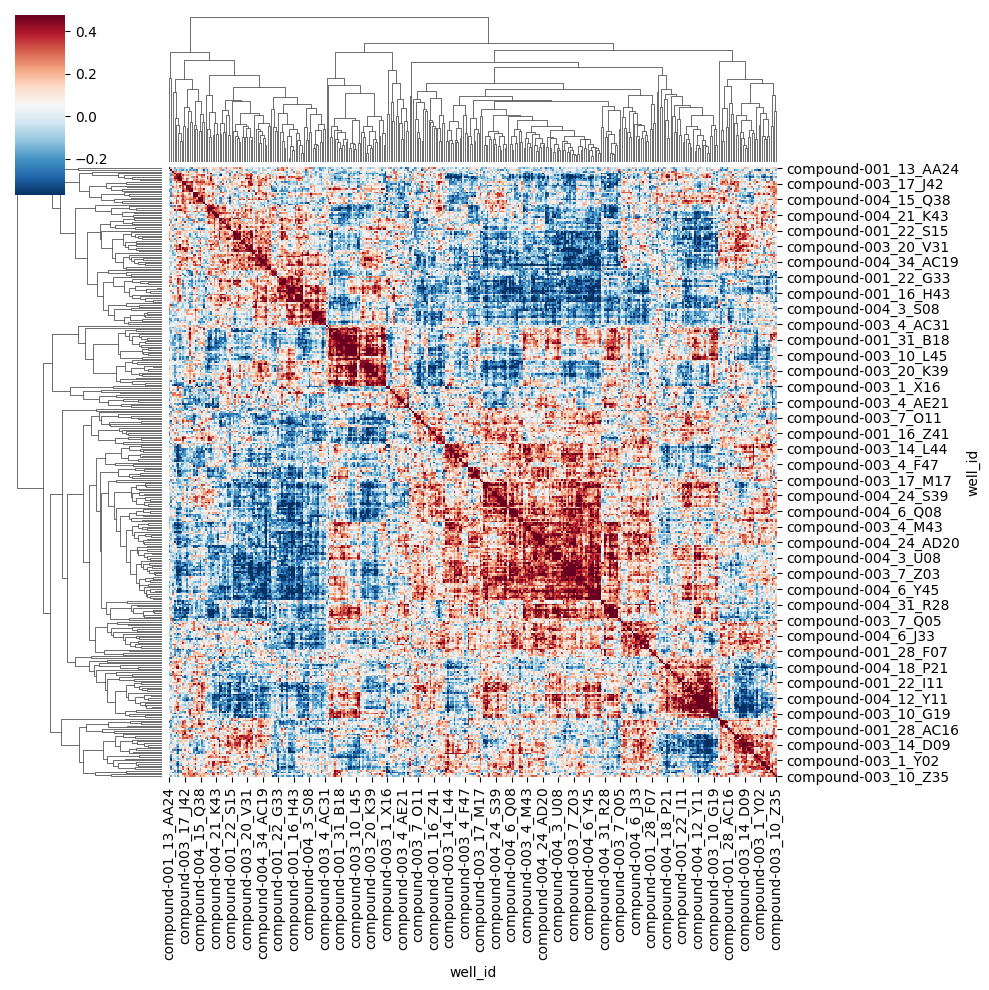

In [54]:
import seaborn as sns
import pandas as pd
import anndata as ad

# Load the anndata object
#adata = ad.read_h5ad('rxrx3.h5ad')
adata.obs_names = adata.obs['well_id']
# Filter for egfr inhibitors
adata = adata[adata.obs['treatment'].isin(egfr_inhibitors), :]

# Reset the index of adata.obs to ensure it's a simple integer index
# adata.obs.reset_index(drop=True, inplace=True)

# Map treatments to unique colors
treatments = adata.obs['treatment']
unique_treatments = treatments.unique()
treatment_colors = sns.color_palette("Set2", len(unique_treatments))
treatment_color_map = {treatment: color for treatment, color in zip(unique_treatments, treatment_colors)}
# col_colors_treatment = treatments.map(treatment_color_map)

# Map concentrations to unique colors
treatment_conc = adata.obs['concentration']
unique_concs = treatment_conc.unique()
conc_colors = sns.color_palette("coolwarm", len(unique_concs))
conc_color_map = {conc: color for conc, color in zip(unique_concs, conc_colors)}
# col_colors_conc = treatment_conc.map(conc_color_map)

# Combine treatment and concentration into a DataFrame
# col_colors_df = pd.DataFrame({
#     'treatment': col_colors_treatment,
#     'concentration': col_colors_conc
# })

# Plot clustermap with both treatment and concentration as column colors
sns.clustermap(
    adata.to_df().T.corr(),
    metric='cosine',
    cmap='RdBu_r',
    robust=True
    # col_colors=col_colors_df
)


/home/ubuntu/EFAAR_benchmarking/.venv/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/ubuntu/EFAAR_benchmarking/.venv/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


,Sorted Compounds


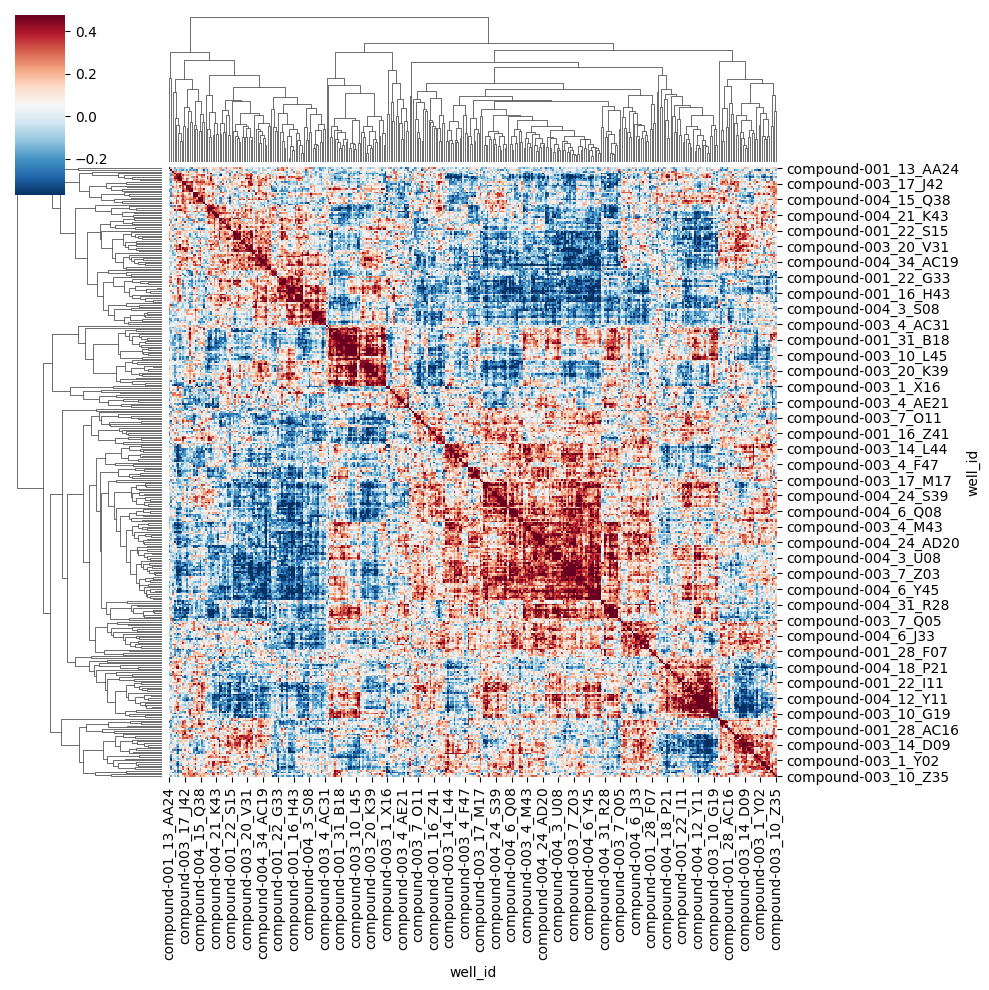

In [73]:
clustermap = sns.clustermap(
    adata.to_df().T.corr(),
    metric='cosine',
    cmap='RdBu_r',
    robust=True
    # col_colors=col_colors_df
)

# Extract the sorted order of the compounds (y-axis)
sorted_index = clustermap.dendrogram_row.reordered_ind
reset_index_adata = adata.to_df().reset_index()
#reset_index_adata.head()
sorted_compounds = reset_index_adata.iloc[sorted_index]['well_id']

# Save to a CSV file or display the list
sorted_compounds.to_csv('clustermap_sorted_compounds.csv', index=False)


In [74]:
#print(clustermap.dendrogram_row.reordered_ind)
#reset_index_adata = adata.to_df().reset_index()
#reset_index_adata.head()
#sorted_compounds = reset_index_adata.iloc[sorted_index]['well_id']
#print(sorted_compounds)
adata.to_df().head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
well_id,,,,,,,,,,,,,,,,,,,,,
compound-004_31_C45,1.210533,1.193158,-0.755308,-2.130571,0.598103,0.204480,1.031096,-1.166268,0.674286,-0.210208,...,-0.491473,-0.352467,1.468680,0.584776,0.743360,1.032267,0.259485,0.701042,-0.323286,-0.341384
compound-003_4_AA05,-1.563225,1.703335,1.980924,0.447899,1.094907,1.418515,1.646572,-0.123626,2.437434,-0.668515,...,-1.527269,-2.389844,-0.465192,1.921972,-0.222443,-2.979086,-0.329294,-0.280283,1.955975,1.212396
compound-004_15_L18,-1.058350,-1.003020,-0.096214,0.153687,1.800862,-0.428771,-0.434672,-0.400108,-0.096748,0.781645,...,-0.134408,1.363545,-0.138507,0.087827,0.359397,1.854562,0.654368,-0.317007,0.486364,0.909725
compound-003_10_N40,-1.771110,0.136387,1.526423,2.305358,-0.901442,-2.757544,-2.015544,-1.055780,0.954329,0.093850,...,-0.251216,0.147421,-2.012134,0.148072,-1.128676,-1.381205,1.152982,-1.930941,0.753950,-1.794269
compound-001_16_Z41,1.235486,1.082615,-0.625712,-0.224223,-0.892819,0.463059,-1.005786,-0.959707,-0.663786,-0.850925,...,0.477902,-0.326629,1.098521,0.467485,1.726894,1.179897,-0.518006,2.284418,-0.012968,0.404101


In [ ]:
adata = ad.read_h5ad('rxrx3.h5ad')
adata.obs_names = adata.obs['well_id']
adata

In [50]:
import seaborn as sns
import pandas as pd
import anndata as ad
import numpy as np

In [52]:

# Map treatments to unique colors
treatments = adata.obs['treatment']
unique_treatments = treatments.unique()
treatment_colors = sns.color_palette("Set2", len(unique_treatments))
treatment_color_map = {treatment: color for treatment, color in zip(unique_treatments, treatment_colors)}
# col_colors_treatment = treatments.map(treatment_color_map)

# Map concentrations to unique colors
treatment_conc = adata.obs['concentration']
unique_concs = treatment_conc.unique()
conc_colors = sns.color_palette("coolwarm", len(unique_concs))
conc_color_map = {conc: color for conc, color in zip(unique_concs, conc_colors)}
# col_colors_conc = treatment_conc.map(conc_color_map)

In [53]:
# Get treatments and concentrations as arrays
treatments = adata.obs['treatment'].values
concentrations = adata.obs['concentration'].values

# Get unique treatments and concentrations
unique_treatments = np.unique(treatments)
unique_concentrations = np.unique(concentrations)

# Create color palettes
treatment_colors = sns.color_palette("Set2", len(unique_treatments))
conc_colors = sns.color_palette("coolwarm", len(unique_concentrations))

# Create mappings from treatments/concentrations to colors
treatment_color_map = dict(zip(unique_treatments, treatment_colors))
conc_color_map = dict(zip(unique_concentrations, conc_colors))

# Map treatments and concentrations to colors
col_colors_treatment = [treatment_color_map[t] for t in treatments]
col_colors_concentration = [conc_color_map[c] for c in concentrations]

# Combine the color lists
col_colors = [col_colors_treatment, col_colors_concentration]

# Plot clustermap with both treatment and concentration as column colors
sns.clustermap(
    adata.to_df().T.corr(),
    metric='cosine',
    cmap='RdBu_r',
    row_colors=col_colors,
    robust=True
)

KeyError: np.float64(nan)

In [ ]:
!wget "https://s3.wasabisys.com/rxrx3-blinded/metadata.zip?AWSAccessKeyId=K4U6TQIYNAQX7Y34W6CS&Signature=vjd9fndZokVVnk%2FEWL42yHlxgrQ%3D&Expires=1729217340&u=c16b0da74799de98f8644b9b23d858d0"
!wget "https://s3.wasabisys.com/rxrx3-blinded/embeddings.tar?AWSAccessKeyId=K4U6TQIYNAQX7Y34W6CS&Signature=IOAkQq3TesGnPIXzWuHvMxy653w%3D&Expires=1729217340&u=c16b0da74799de98f8644b9b23d858d0"